In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
dfr = pd.read_csv("opp-edge-eval-runs.csv", parse_dates=['time_stamp'])
dfr.info()
dfr.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype                                
---  ------         --------------  -----                                
 0   scenario_id    2400 non-null   int64                                
 1   simulation_id  2400 non-null   object                               
 2   trail_id       2400 non-null   int64                                
 3   time_stamp     2400 non-null   datetime64[ns, pytz.FixedOffset(120)]
 4   provider_id    2400 non-null   object                               
 5   command        2400 non-null   object                               
 6   step           2400 non-null   int64                                
 7   match_id       2400 non-null   object                               
 8   run_config     2340 non-null   object                               
 9   run_number     2340 non-null   float64                              
 10  

,scenario_id,simulation_id,trail_id,time_stamp,provider_id,command,step,match_id,run_config,run_number,error
0,1,tictoc-4002762f,0,2021-09-08 14:01:20.150211+02:00,patricks-mbp-1cc60c26,Checkout,1,0xc8d77b45,NaN,NaN,NaN
1,1,tictoc-4002762f,0,2021-09-08 14:01:20.320344+02:00,patricks-mbp-1cc60c26,Checkout,2,0xc8d77b45,NaN,NaN,NaN
2,1,tictoc-4002762f,0,2021-09-08 14:01:20.320825+02:00,patricks-mbp-1cc60c26,Compile,1,0x78dfe88b,NaN,NaN,NaN
3,1,tictoc-4002762f,0,2021-09-08 14:01:28.090523+02:00,patricks-mbp-1cc60c26,Compile,2,0x78dfe88b,NaN,NaN,NaN
4,1,tictoc-4002762f,0,2021-09-08 14:01:28.174318+02:00,patricks-mbp-1cc60c26,Execution,1,0xd6cb7513,TicToc18,0.0,NaN


In [34]:
dft = pd.read_csv("opp-edge-eval-transfers.csv", parse_dates=['time_stamp'])
dft.info()
dft.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype                                
---  ------             --------------  -----                                
 0   scenario_id        2400 non-null   int64                                
 1   simulation_id      2400 non-null   object                               
 2   trail_id           2400 non-null   int64                                
 3   time_stamp         2400 non-null   datetime64[ns, pytz.FixedOffset(120)]
 4   provider_id        2400 non-null   object                               
 5   step               2400 non-null   int64                                
 6   match_id           2400 non-null   object                               
 7   direction          2400 non-null   object                               
 8   bytes_transferred  2400 non-null   int64                                
 9   error              0 non-null 

,scenario_id,simulation_id,trail_id,time_stamp,provider_id,step,match_id,direction,bytes_transferred,error
0,1,tictoc-4002762f,0,2021-09-08 14:01:20.138608+02:00,patricks-mbp-1cc60c26,1,0x4da53ae6,Upload,0,NaN
1,1,tictoc-4002762f,0,2021-09-08 14:01:20.150153+02:00,patricks-mbp-1cc60c26,2,0x4da53ae6,Upload,2688430,NaN
2,1,tictoc-4002762f,0,2021-09-08 14:01:28.090543+02:00,patricks-mbp-1cc60c26,1,0x14965f44,Download,0,NaN
3,1,tictoc-4002762f,0,2021-09-08 14:01:28.098172+02:00,patricks-mbp-1cc60c26,2,0x14965f44,Download,2097152,NaN
4,1,tictoc-4002762f,0,2021-09-08 14:01:34.228962+02:00,patricks-mbp-1cc60c26,1,0xa443ee51,Download,0,NaN


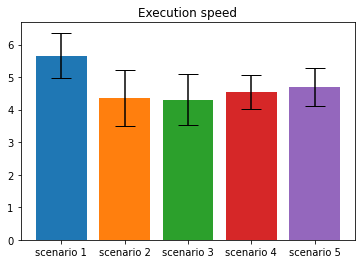

In [39]:
scenarios = dfr.scenario_id.unique()

plt.title("Execution speed")

for scenario in scenarios:
    execution_start = dfr.loc[(dfr.scenario_id == scenario) & (dfr.command == "Execution") & (dfr.step == 1)].sort_values(by=['match_id'])
    execution_end   = dfr.loc[(dfr.scenario_id == scenario) & (dfr.command == "Execution") & (dfr.step == 2)].sort_values(by=['match_id'])

    durations = pd.to_timedelta(execution_end.time_stamp.values - execution_start.time_stamp.values)
    mean = durations.mean()
    std = durations.std()

    plt.bar(f"scenario {scenario}", mean.total_seconds(), yerr=std.total_seconds(), capsize=10)
        

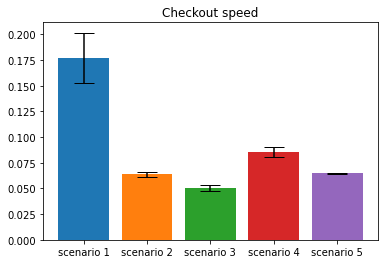

In [38]:
scenarios = dfr.scenario_id.unique()

plt.title("Checkout speed")

for scenario in scenarios:
    execution_start = dfr.loc[(dfr.scenario_id == scenario) & (dfr.command == "Checkout") & (dfr.step == 1)].sort_values(by=['match_id'])
    execution_end   = dfr.loc[(dfr.scenario_id == scenario) & (dfr.command == "Checkout") & (dfr.step == 2)].sort_values(by=['match_id'])

    durations = pd.to_timedelta(execution_end.time_stamp.values - execution_start.time_stamp.values)
    mean = durations.mean()
    std = durations.std()

    plt.bar(f"scenario {scenario}", mean.total_seconds(), yerr=std.total_seconds(), capsize=10)
    


scenario-1 tranfered=497025024 sum=2.322583 mean=213996668.36448905
scenario-2 tranfered=497025024 sum=21592.719116 mean=23018.176697890223
scenario-3 tranfered=497025024 sum=22755.439892 mean=21842.031020228103
scenario-4 tranfered=497025024 sum=20125.397792 mean=24696.407451760842
scenario-5 tranfered=497025024 sum=18664.598753 mean=26629.2905932474


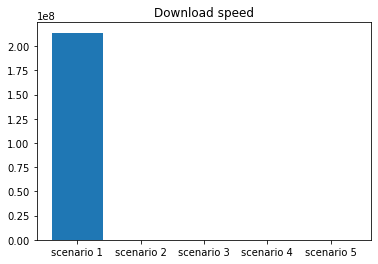

In [40]:
scenarios = dft.scenario_id.unique()

plt.title("Download speed")

for scenario in scenarios:
    tranfer_start = dft.loc[(dft.scenario_id == scenario) & (dft.direction == "Download") & (dft.step == 1)].sort_values(by=['match_id'])
    tranfer_end   = dft.loc[(dft.scenario_id == scenario) & (dft.direction == "Download") & (dft.step == 2)].sort_values(by=['match_id'])
    tranfered     = dft.loc[(dft.scenario_id == scenario) & (dft.direction == "Download")].bytes_transferred.sum()
    
    durations = pd.to_timedelta(tranfer_end.time_stamp.values - tranfer_start.time_stamp.values)
    mean = tranfered / durations.sum().total_seconds()

    print(f"scenario-{scenario} tranfered={tranfered} sum={durations.sum().total_seconds()} mean={mean}")

    plt.bar(f"scenario {scenario}", mean)
        

scenario-1 tranfered=8085472 sum=0.038138 mean=212005663.64256123
scenario-2 tranfered=1341437 sum=2.962613 mean=452788.46747786494
scenario-3 tranfered=1413578 sum=4.561015 mean=309926.18967488594
scenario-4 tranfered=1462264 sum=4.087846 mean=357710.1485721331
scenario-5 tranfered=1517891 sum=4.152794 mean=365510.7862321126


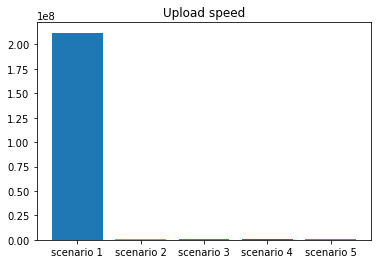

In [41]:
scenarios = dft.scenario_id.unique()

plt.title("Upload speed")

for scenario in scenarios:
    tranfer_start = dft.loc[(dft.scenario_id == scenario) & (dft.direction == "Upload") & (dft.step == 1)].sort_values(by=['match_id'])
    tranfer_end   = dft.loc[(dft.scenario_id == scenario) & (dft.direction == "Upload") & (dft.step == 2)].sort_values(by=['match_id'])
    tranfered     = dft.loc[(dft.scenario_id == scenario) & (dft.direction == "Upload")].bytes_transferred.sum()
    
    durations = pd.to_timedelta(tranfer_end.time_stamp.values - tranfer_start.time_stamp.values)
    mean = (tranfered / durations.sum().total_seconds())
    
    print(f"scenario-{scenario} tranfered={tranfered} sum={durations.sum().total_seconds()} mean={mean}")

    plt.bar(f"scenario {scenario}", mean)
        